Visualization

1. Number of Orders by Region

In [2]:
import pandas as pd

# Load data
df = pd.read_csv('transformed/transformed_full.csv')  

# Save as Parquet 
df.to_parquet('loaded/full_data.parquet', index=False)

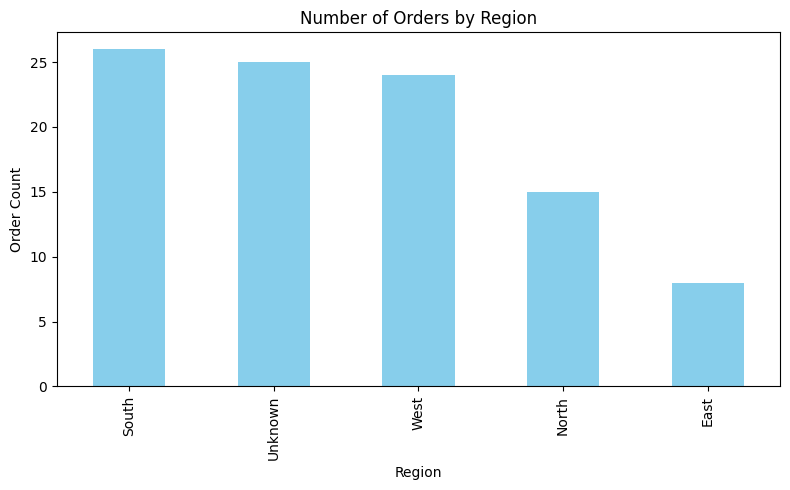

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Parquet file
df = pd.read_parquet('loaded/full_data.parquet')

# Group by region
region_counts = df['region'].fillna('Unknown').value_counts()

# Plot
plt.figure(figsize=(8,5))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Orders by Region')
plt.xlabel('Region')
plt.ylabel('Order Count')
plt.tight_layout()
plt.savefig('loaded/orders_by_region.png')
plt.show()

2. Total Sales Over Time Line Chart

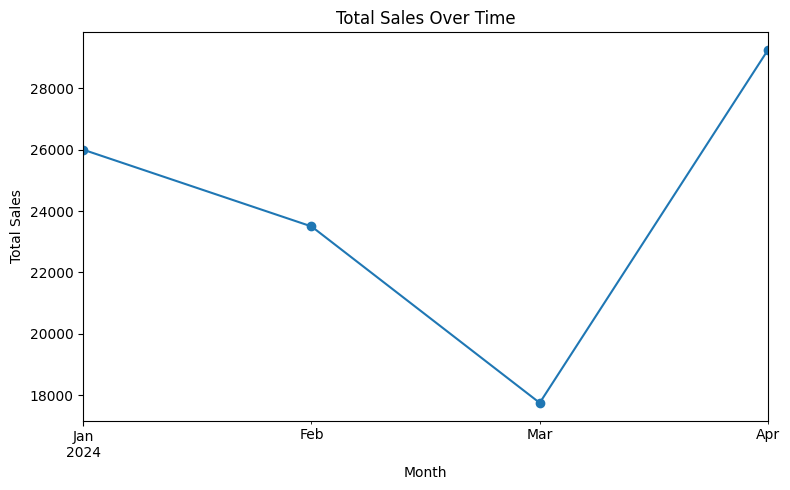

In [4]:
# Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['total_price'] = df['quantity'] * df['unit_price']

# Group by month
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['total_price'].sum()

# Plot
monthly_sales.plot(kind='line', marker='o', figsize=(8,5))
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('loaded/total_sales_over_time.png')
plt.show()